Поколение 1: Лучшая приспособленность = -0.12102998841941794


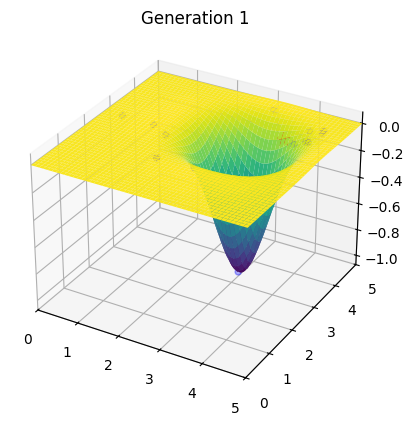

Поколение 2: Лучшая приспособленность = -0.984399503645625
Поколение 3: Лучшая приспособленность = -0.984399503645625
Поколение 4: Лучшая приспособленность = -0.9903634092988397
Поколение 5: Лучшая приспособленность = -0.9994178628657874
Поколение 6: Лучшая приспособленность = -0.9999419360586966
Поколение 7: Лучшая приспособленность = -0.9999419360586966
Поколение 8: Лучшая приспособленность = -0.9999662909185741
Поколение 9: Лучшая приспособленность = -0.9999662909185741
Поколение 10: Лучшая приспособленность = -0.9999662909185741
Поколение 11: Лучшая приспособленность = -0.9999662909185741
Поколение 12: Лучшая приспособленность = -0.9999662909185741
Поколение 13: Лучшая приспособленность = -0.9999662909185741
Поколение 14: Лучшая приспособленность = -0.9999662909185741
Поколение 15: Лучшая приспособленность = -0.9999662909185741
Поколение 16: Лучшая приспособленность = -0.9999662909185741
Поколение 17: Лучшая приспособленность = -0.9999662909185741
Поколение 18: Лучшая приспособленн

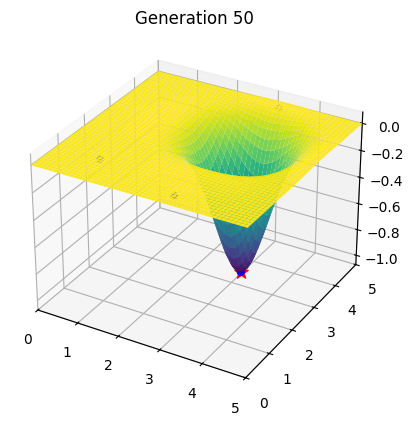

Поколение 51: Лучшая приспособленность = -0.9999662909185741
Поколение 52: Лучшая приспособленность = -0.9999662909185741
Поколение 53: Лучшая приспособленность = -0.9999662909185741
Поколение 54: Лучшая приспособленность = -0.9999662909185741
Поколение 55: Лучшая приспособленность = -0.9999662909185741
Поколение 56: Лучшая приспособленность = -0.9999662909185741
Поколение 57: Лучшая приспособленность = -0.9999662909185741
Поколение 58: Лучшая приспособленность = -0.9999662909185741
Лучшее решение: [3.14621523 3.14264378] с приспособленностью -0.9999662909185741


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Функция Easom
def easom_function(x):
    if len(x) != 2:
        raise ValueError('Индивидуум должен быть вектором с 2 элементами.')
    x1, x2 = x
    return -np.cos(x1) * np.cos(x2) * np.exp(-((x1 - np.pi) ** 2 + (x2 - np.pi) ** 2))

# Инициализация популяции
def initialize_population(pop_size, num_variables, bounds):
    return bounds[0] + (bounds[1] - bounds[0]) * np.random.rand(pop_size, num_variables)

# Оценка популяции (вычисление приспособленности)
def evaluate_population(population):
    fitness = np.zeros(population.shape[0])
    for i, individual in enumerate(population):
        if len(individual) != 2:
            fitness[i] = np.inf  # Некорректные индивиды получают максимальное значение приспособленности
        else:
            fitness[i] = easom_function(individual)
    return fitness

# Оператор кроссинговера
def crossover(parent1, parent2):
    alpha = np.random.rand()
    offspring = alpha * parent1 + (1 - alpha) * parent2
    if len(offspring) != 2:
        offspring = np.random.rand(2)  # Генерация корректного потомка
    return offspring

# Оператор мутации
def mutation(individual, mutation_rate, bounds):
    if np.random.rand() < mutation_rate:
        gene = np.random.randint(len(individual))
        individual[gene] = bounds[0] + (bounds[1] - bounds[0]) * np.random.rand()
    return individual

# Оператор отбора (турнирный отбор)
def selection(population, fitness):
    tournament_size = 3
    idx1 = np.random.randint(0, len(population), tournament_size)
    idx2 = np.random.randint(0, len(population), tournament_size)

    parent1 = population[idx1[np.argmin(fitness[idx1])]]
    parent2 = population[idx2[np.argmin(fitness[idx2])]]

    return parent1, parent2

# Построение графика функции и популяции
def plot_easom(population, generation, bounds, best_solution):
    x1 = np.linspace(bounds[0], bounds[1], 500)
    x2 = np.linspace(bounds[0], bounds[1], 500)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.array([[easom_function([x1_, x2_]) for x1_ in x1] for x2_ in x2])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')

    # Фильтрация некорректных индивидуумов
    valid_population = np.array([ind for ind in population if len(ind) == 2])

    ax.scatter(valid_population[:, 0], valid_population[:, 1],
               [easom_function(ind) for ind in valid_population], c='blue', marker='o')

    ax.scatter(best_solution[0], best_solution[1],
               easom_function(best_solution), c='red', marker='*', s=100)

    ax.set_title(f'Generation {generation}')
    ax.set_xlim(bounds[0], bounds[1])
    ax.set_ylim(bounds[0], bounds[1])
    plt.show()

# Основной цикл генетического алгоритма
def genetic_algorithm(pop_size, max_iterations, max_stagnation, mutation_rate, bounds):
    num_variables = 2  # Количество переменных (размер хромосомы)
    population = initialize_population(pop_size, num_variables, bounds)

    stagnation_counter = 0  # Счётчик стагнации
    best_fitness = np.inf  # Начальное лучшее значение фитнеса
    generation = 0
    best_solution = None

    while generation < max_iterations and stagnation_counter < max_stagnation:
        generation += 1
        fitness = evaluate_population(population)  # Оценка популяции

        # Найти лучшую особь
        current_best_fitness = np.min(fitness)
        best_idx = np.argmin(fitness)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_solution = population[best_idx]
            stagnation_counter = 0  # Сброс счётчика стагнации
        else:
            stagnation_counter += 1

        # Вывод информации
        print(f'Поколение {generation}: Лучшая приспособленность = {best_fitness}')

        # Операторы генетического алгоритма
        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = selection(population, fitness)
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
            offspring1 = mutation(offspring1, mutation_rate, bounds)
            offspring2 = mutation(offspring2, mutation_rate, bounds)
            new_population.append(offspring1)
            new_population.append(offspring2)

        population = np.array(new_population)

        # Визуализация в определённых поколениях
        if generation in [1, 50, 100]:
            plot_easom(population, generation, bounds, best_solution)

    return best_solution, best_fitness

# Запуск алгоритма
if __name__ == "__main__":
    pop_size = 20
    max_iterations = 200
    max_stagnation = 50
    mutation_rate = 0.1
    bounds = [0, 5]  # Границы переменных

    best_solution, best_fitness = genetic_algorithm(pop_size, max_iterations, max_stagnation, mutation_rate, bounds)
    print(f'Лучшее решение: {best_solution} с приспособленностью {best_fitness}')
